In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import matplotlib.pyplot as plt

In [2]:
csv_file_path = r'C:\Users\gijsv\OneDrive\Documenten\Ironhack\week5\day2\amz_uk_price_prediction_dataset.csv (1)\amz_uk_price_prediction_dataset.csv'
df_original = pd.read_csv(csv_file_path)
df = df_original.copy()

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result_prop = crosstab_result.copy()
crosstab_result_prop['Proportion'] = crosstab_result[True] / crosstab_result.sum(axis=1)
crosstab_result_prop.sort_values(by='Proportion', ascending=False)

isBestSeller,False,True,Proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


As we can see we dont have categories where bestseller is more prevalent

In [5]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)
chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [6]:
association(crosstab_result, method="cramer")

0.1222829439760564

The Cramér's V value of 0.122 suggests a weak association between the two variables. Though statistically significant, the strength of this relationship is not very strong in practical terms.

<Axes: xlabel='category'>

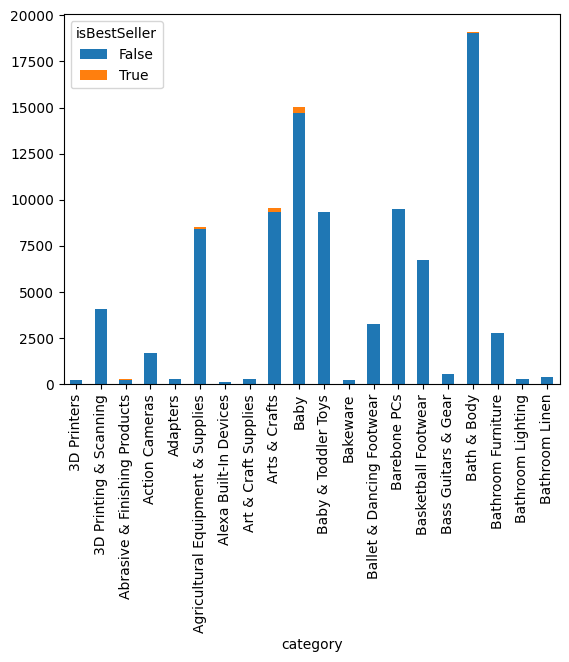

In [7]:
crosstab_result.head(20).plot(kind="bar", stacked=True)

Showing all categories and their relationship with bestseller status is not possible because of the very high amount of categories. 
Here we see that all columns have a way higher false value for bestseller status

In [8]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(upper_bound)

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [9]:
filtered_df = df.copy()
outliers = tukeys_test_outliers(filtered_df['price'])
filtered_df = filtered_df[~filtered_df.isin(outliers)]

99.99000000000001


Check if outliers are filtered from data

In [10]:
max_price = filtered_df['price'].max()
max_price

99.99

Violin plot of price across top 20 categories

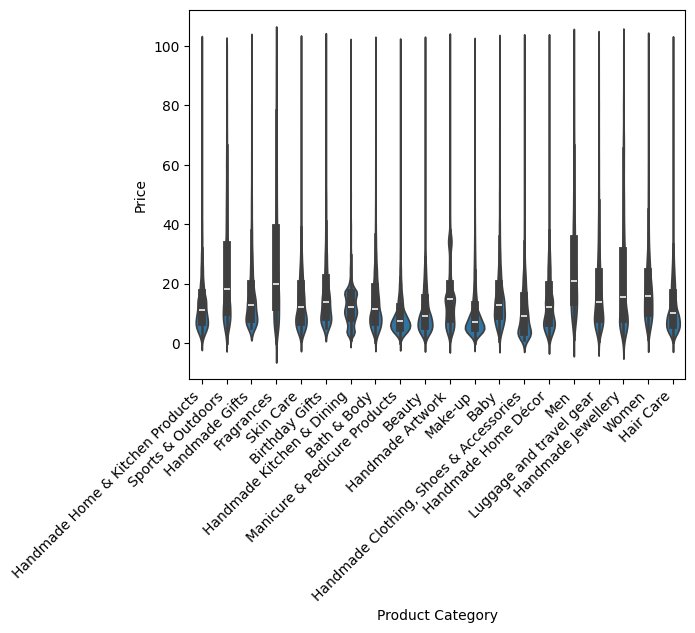

In [11]:
category_counts = filtered_df['category'].value_counts()
top_categories = category_counts.head(20).index

df_top_categories = filtered_df[filtered_df['category'].isin(top_categories)]

sns.violinplot(data=df_top_categories, x='category', y='price')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
median_prices_by_category = filtered_df.groupby('category')['price'].median()

category_highest_median_price = median_prices_by_category.idxmax()
print('The product with the highest median price is :' ,category_highest_median_price)

The product with the highest median price is : Desktop PCs


In [27]:
highest_median_price = median_prices_by_category.max()
print('The product with the highest median price is :' ,category_highest_median_price, 'with a price of :', highest_median_price)

The product with the highest median price is : Desktop PCs with a price of : 74.0


In [14]:
top_10_category = category_counts.head(10).index
top_10_category.groupby

<bound method Index.groupby of Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts', 'Manicure & Pedicure Products',
       'Skin Care', 'Make-up', 'Hair Care', 'Fragrances'],
      dtype='object', name='category')>

In [15]:
average_prices = filtered_df.groupby('category')['price'].mean().loc[top_categories]
average_prices

category
Sports & Outdoors                         25.172065
Beauty                                    12.523480
Handmade Clothing, Shoes & Accessories    12.958639
Bath & Body                               14.678683
Birthday Gifts                            18.600195
Manicure & Pedicure Products              10.231825
Skin Care                                 15.654722
Make-up                                   10.612918
Hair Care                                 13.461408
Fragrances                                28.544912
Handmade Gifts                            17.395112
Handmade Home Décor                       15.413691
Luggage and travel gear                   19.718228
Handmade Jewellery                        22.801007
Handmade Artwork                          17.461758
Women                                     20.408735
Handmade Home & Kitchen Products          14.079947
Handmade Kitchen & Dining                 13.119728
Men                                       27.461174
Bab

bar chart comparing the average price of products for the top 10 product categories

<Axes: xlabel='category'>

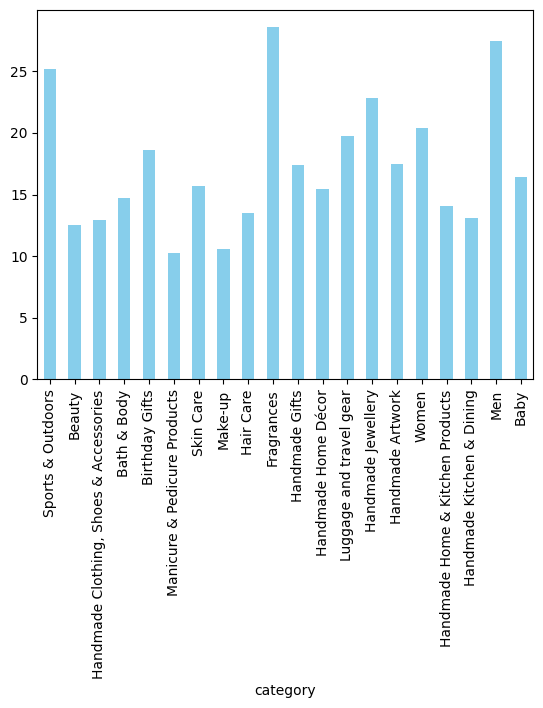

In [16]:
average_prices.plot(kind='bar', color='skyblue')

In [30]:
average_prices_max = filtered_df.groupby('category')['price'].mean().max()

In [31]:
highest_avg_price_category =  filtered_df.groupby('category')['price'].mean().idxmax()
highest_avg_price =  filtered_df.groupby('category')['price'].mean().max()
print("The product category with the highest average price is:" ,highest_avg_price_category, "with a price of: ", highest_avg_price)

The product category with the highest average price is: Motherboards with a price of:  68.77243243243242


Distribution of product ratings based on their category

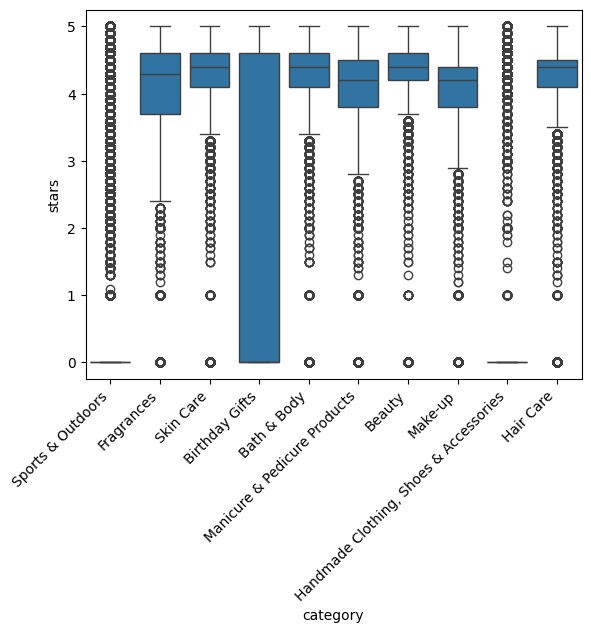

In [19]:
category_counts = filtered_df['category'].value_counts()
top_categories = category_counts.head(10).index
df_top_categories = filtered_df[filtered_df['category'].isin(top_categories)]

sns.boxplot(data=df_top_categories, x='category', y='stars')
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
average_rating_max = filtered_df.groupby('category')['stars'].median().idxmax()
print("The category that receives the highest median rating is:", average_rating_max)

The category that receives the highest median rating is: Computer Memory


In [21]:
correlation_coefficient = df['price'].corr(df['stars'])

print("Correlation coefficient between price and stars:", correlation_coefficient)

Correlation coefficient between price and stars: -0.1249067326214861


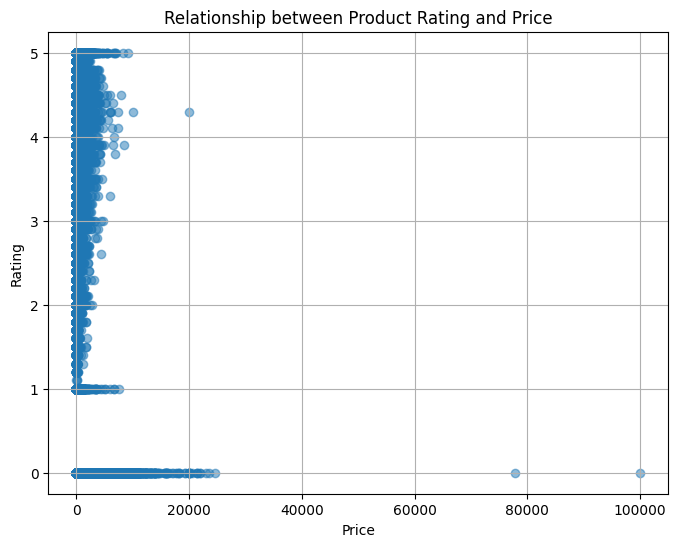

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['stars'], alpha=0.5)
plt.title('Relationship between Product Rating and Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

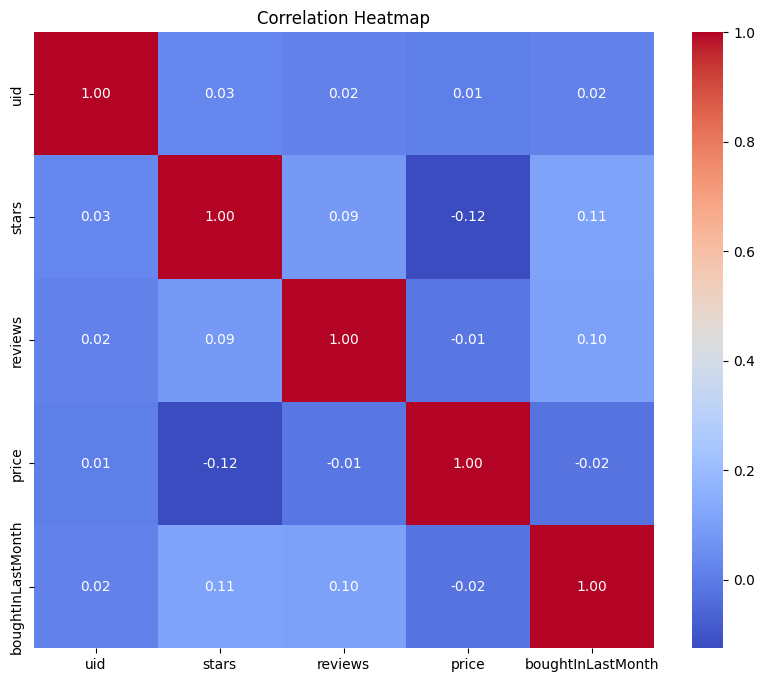

In [24]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

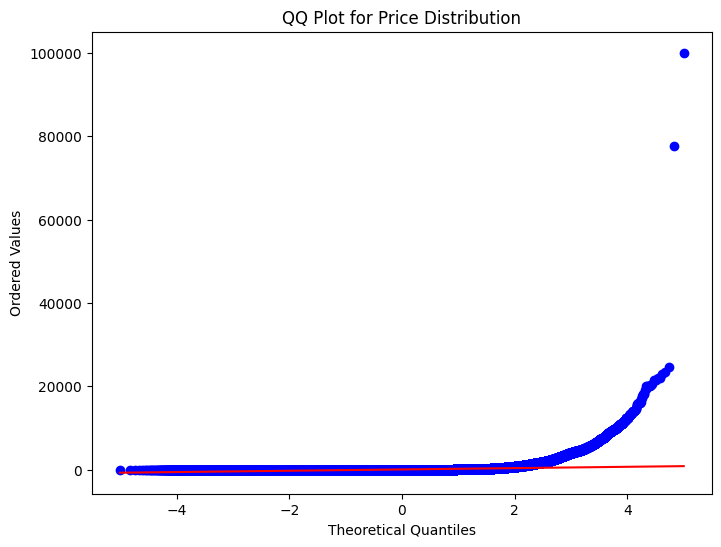

In [25]:
plt.figure(figsize=(8, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Price Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

AS we can see above product prices do not follow the normal distrubtion in the QQ plot